In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/plant-seedlings-classification/sample_submission.csv
/kaggle/input/plant-seedlings-classification/train/Maize/a5c2eec2d.png
/kaggle/input/plant-seedlings-classification/train/Maize/8cd93b279.png
/kaggle/input/plant-seedlings-classification/train/Maize/8c6fba454.png
/kaggle/input/plant-seedlings-classification/train/Maize/abadd72ab.png
/kaggle/input/plant-seedlings-classification/train/Maize/f60369038.png
/kaggle/input/plant-seedlings-classification/train/Maize/2d8376136.png
/kaggle/input/plant-seedlings-classification/train/Maize/107bd7230.png
/kaggle/input/plant-seedlings-classification/train/Maize/b8b2658d9.png
/kaggle/input/plant-seedlings-classification/train/Maize/280c7b4d2.png
/kaggle/input/plant-seedlings-classification/train/Maize/fbd09f3a5.png
/kaggle/input/plant-seedlings-classification/train/Maize/16e38d4af.png
/kaggle/input/plant-seedlings-classification/train/Maize/31d92d77d.png
/kaggle/input/plant-seedlings-classification/train/Maize/f30971a76.png
/kaggle/in

/kaggle/input/plant-seedlings-classification/train/Charlock/db96c0bab.png
/kaggle/input/plant-seedlings-classification/train/Charlock/9cdf5eb74.png
/kaggle/input/plant-seedlings-classification/train/Charlock/34dab243e.png
/kaggle/input/plant-seedlings-classification/train/Charlock/f5672ef15.png
/kaggle/input/plant-seedlings-classification/train/Charlock/8d16914a3.png
/kaggle/input/plant-seedlings-classification/train/Charlock/f193af8d4.png
/kaggle/input/plant-seedlings-classification/train/Charlock/846db9b8a.png
/kaggle/input/plant-seedlings-classification/train/Charlock/3217ef372.png
/kaggle/input/plant-seedlings-classification/train/Charlock/d8bd75282.png
/kaggle/input/plant-seedlings-classification/train/Charlock/cdbf55495.png
/kaggle/input/plant-seedlings-classification/train/Charlock/de1dc1b00.png
/kaggle/input/plant-seedlings-classification/train/Charlock/100f53f2a.png
/kaggle/input/plant-seedlings-classification/train/Charlock/8b35222d0.png
/kaggle/input/plant-seedlings-classifi

/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/72824c328.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/c4cfb9893.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/8bc379617.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/a82d370cd.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/79eb0958f.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/4408bae35.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/c24269f00.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b62d20d32.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/7d69c71e1.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/406f54018.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/d53f66132.png
/kaggle/input/plant-seedlings-classification/train/Scentless Mayweed/b5ce957cf.png
/kag

/kaggle/input/plant-seedlings-classification/test/0a64e3e6c.png
/kaggle/input/plant-seedlings-classification/test/8170d33c1.png
/kaggle/input/plant-seedlings-classification/test/cf46d09c5.png
/kaggle/input/plant-seedlings-classification/test/16fd2e01a.png
/kaggle/input/plant-seedlings-classification/test/fea355851.png
/kaggle/input/plant-seedlings-classification/test/969a851be.png
/kaggle/input/plant-seedlings-classification/test/521b27a17.png
/kaggle/input/plant-seedlings-classification/test/958bb9e96.png
/kaggle/input/plant-seedlings-classification/test/a2d25b4f3.png
/kaggle/input/plant-seedlings-classification/test/20ea96bcc.png
/kaggle/input/plant-seedlings-classification/test/90b595f12.png
/kaggle/input/plant-seedlings-classification/test/bb20fce02.png
/kaggle/input/plant-seedlings-classification/test/19e58cc5e.png
/kaggle/input/plant-seedlings-classification/test/0bf7bfb05.png
/kaggle/input/plant-seedlings-classification/test/e98e5d1d5.png
/kaggle/input/plant-seedlings-classifica

In [0]:
!ls /kaggle/input/plant-seedlings-classification/

sample_submission.csv  test  train


In [0]:
import os
len(os.listdir('/kaggle/input/plant-seedlings-classification/test'))

794

In [0]:
os.listdir('/kaggle/input/plant-seedlings-classification/train')

['Maize',
 'Fat Hen',
 'Common Chickweed',
 'Cleavers',
 'Charlock',
 'Loose Silky-bent',
 'Small-flowered Cranesbill',
 'Black-grass',
 'Scentless Mayweed',
 'Sugar beet',
 'Common wheat',
 'Shepherds Purse']

In [0]:
len(os.listdir('/kaggle/input/plant-seedlings-classification/train/Maize'))

221

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
%matplotlib inline

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [0]:
IMAGE_SIZE = 224
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
NUM_CLASSES = 12
EPOCHS = 15
BATCH_SIZE = 64
TEST_SIZE = 30
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)
training_data_dir = '/kaggle/input/plant-seedlings-classification/train'

In [0]:
# Data augmentation
training_data_generator = ImageDataGenerator(
   preprocessing_function=keras.applications.resnet50.preprocess_input,
   rotation_range=40,
   width_shift_range=0.2,
   height_shift_range=0.2,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   vertical_flip=True, validation_split = 0.2)

training_generator = training_data_generator.flow_from_directory(
   training_data_dir,
   target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
   batch_size=BATCH_SIZE,
   class_mode="categorical")

Found 4750 images belonging to 12 classes.


In [0]:
!pip install livelossplot
from livelossplot import PlotLossesKeras

In [0]:
import keras
from keras.models import Model, load_model
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications import ResNet50, InceptionV3
from keras import backend as K
K.set_learning_phase(0)
#Load the VGG model
base_model = ResNet50(weights='imagenet', include_top=False, pooling = 'avg', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
#print(base_model.summary())
K.set_learning_phase(1)
# # Create the model
model = keras.models.Sequential()
# # Add the vgg convolutional base model
model.add(base_model)
# # Add new layers
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# Freeze the layers
for layer in base_model.layers:
   layer.trainable = False
# # Show a summary of the model. Check the number of trainable parameters
print(model.summary())

94658560/94653016 [==============================] - 1s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
batch_normalization_1 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 23,859,724
Trainable params: 267,916
Non-trainable params: 23,591,808
_________________________________________________________________
None


In [0]:
from keras.optimizers import SGD, Adam
model.compile(loss="categorical_crossentropy",
             optimizer=Adam(),
             metrics=["accuracy"])

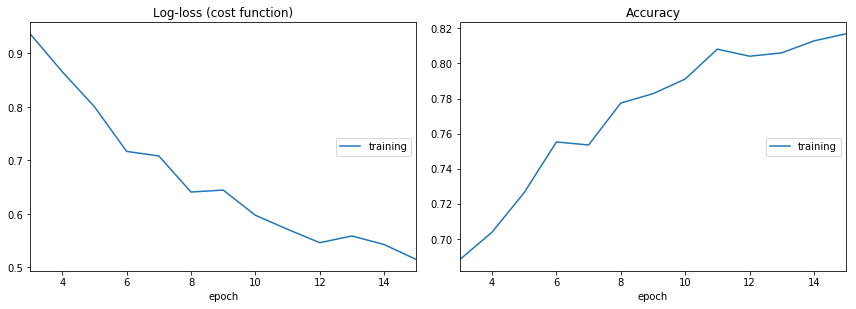

Log-loss (cost function):
training   (min:    0.515, max:    1.932, cur:    0.515)

Accuracy:
training   (min:    0.447, max:    0.817, cur:    0.817)


In [0]:
# Training
model.fit_generator(
   training_generator,
   steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
   epochs=EPOCHS,
   callbacks=[PlotLossesKeras()],
   verbose=1)

In [0]:
np.random.seed(seed)